In [55]:
# foto splitsen in 4 van 32x32
# 

from SimpleCV import *
from IPython.display import HTML
import matplotlib as plt
import matplotlib.image as mpimg
import pandas as pd
import cv2
import glob

In [86]:
disp = Display(displaytype='notebook')
size = 32

imagelist = []

# get all files and add them to tuple with the postal codes
for filename in glob.glob("../dataset-images/*.png"): 
    image = Image(filename)
    image = image.binarize().dilate().erode()
    answer = filename[18:22]
    imagelist.append((answer, image))
    
numbers = []

# seperate individual number images with the number
for image in imagelist:
    for i in range(4):
        digit = image[0][(0 if i+1 == 1 else i):i+1]
        numbers.append((digit, image[1].crop(i*size, 0, size, size*(i+1) )))

In [87]:
# divide number images into pieces of 4x4 and create matrix
def createMatrix(image):
    size = 8
    m = np.zeros((4,4))

    pieces = []
    for y in range(4):
        for x in range(4):
            crop = image.crop(x*size, y*size, size, size)
            pieces.append(crop)
            m[x][y] = 1 if crop.meanColor()[0] > 80 else 0

    return m.T

In [103]:
def isCentroidPixelBlack(image, centroid):
    img = image.crop(centroid[0], centroid[1], 1, 1)
    color = img.meanColor()
    return 0 if color[0] > 200 else 1

In [104]:
def getBlobInfo(image):
    image.show()
    blobs = image.findBlobs()
    image.draw(blobs, autocolor=True)
    return blobs[0]

In [105]:
numbersDict = {
    "matrix_top_row": [],
    "matrix_second_row": [],
    "matrix_third_row": [],
    "matrix_bottom_row": [],
    "blob_area" : [],
    "blob_centroid_x" : [],
    "blob_centroid_y" : [],
    "blob_angle" : [],
    "blob_height": [],
    "blob_width": [],
    "centroid_is_black": [],
    "label" : []
}

for number in numbers:
    image = number[1]
    blob = getBlobInfo(image)
    matrix = createMatrix(image)
    centroid = blob.centroid()
    numbersDict["matrix_top_row"].append(sum(matrix[0]))
    numbersDict["matrix_second_row"].append(sum(matrix[1]))
    numbersDict["matrix_third_row"].append(sum(matrix[2]))
    numbersDict["matrix_bottom_row"].append(sum(matrix[3]))
    numbersDict["blob_area"].append(blob.area())
    numbersDict["blob_centroid_x"].append(centroid[0])
    numbersDict["blob_centroid_y"].append(centroid[1])
    numbersDict["blob_angle"].append(blob.angle())
    numbersDict["blob_height"].append(blob.height())
    numbersDict["blob_width"].append(blob.width())
    numbersDict["centroid_is_black"].append(isCentroidPixelBlack(image, centroid))
    numbersDict["label"].append(number[0])
           
df = pd.DataFrame(numbersDict)
df = df[["matrix_top_row", 
         "matrix_second_row", 
         "matrix_third_row", 
         "matrix_bottom_row", 
         "blob_area", 
         "blob_centroid_x", 
         "blob_centroid_y",
         "blob_angle",
         "blob_height",
         "blob_width",
         "centroid_is_black",
         "label"]]
df = df.sort_values("label")

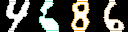

[ 265.   280.5  291.   420. ]


In [85]:
# TEST : 4686: too many blobs

testImage = Image("../dataset-images/4686.png")
testImage = testImage.binarize().dilate().erode()
blobs = testImage.findBlobs()
testImage.draw(blobs, autocolor=True)
testImage.save(disp)
print blobs.area()

testNums = []

for i in range(4):
    testNums.append(testImage.crop(i*size, 0, size, size*(i+1) ))

In [106]:
df.to_csv("../dataset-numpy/dataset_features.csv", sep=',', encoding='utf-8')

In [107]:
df.describe()

,matrix_top_row,matrix_second_row,matrix_third_row,matrix_bottom_row,blob_area,blob_centroid_x,blob_centroid_y,blob_angle,blob_height,blob_width,centroid_is_black
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,1.843750,1.613021,1.588021,1.844271,291.653385,15.859298,15.380416,50.857330,29.997917,20.457292,0.295312
std,0.493377,0.558918,0.586954,0.604153,67.428881,1.193617,1.869070,65.489537,0.064533,2.035446,0.456302
min,0.000000,0.000000,0.000000,0.000000,153.000000,11.835737,10.582800,-87.878899,28.000000,10.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,244.000000,15.077516,14.116460,65.718203,30.000000,20.000000,0.000000
50%,2.000000,2.000000,2.000000,2.000000,275.500000,15.797984,15.295089,85.236358,30.000000,20.000000,0.000000
75%,2.000000,2.000000,2.000000,2.000000,326.000000,16.571982,16.354908,90.000000,30.000000,22.000000,1.000000
max,3.000000,3.000000,3.000000,3.000000,512.000000,20.410788,20.841542,90.000000,30.000000,30.000000,1.000000
